
# What features determine the price of an Airbnb rental?

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import pandas                as pd
from   collections           import Counter
%matplotlib inline
sns.set()

## Introduction

**Business Context**. Airbnb is an enormous online marketplace for everyday people to rent places to stay. It is a large and lucrative market, but many vendors are simply individuals who are renting their own primary residence for short visits. Even larger vendors are typically small businesses with only a small number of places to rent. As a result, they have limited ability to assess large-scale trends and set optimal prices.

Airbnb has rolled out a new service to help listers set prices. Airbnb makes a percentage commission off of the listings, so they are incentivized to help listers price optimally; that is, at the maximum possible point where they will still close a deal. You are an Airbnb consultant helping with this new pricing service.

**Business Problem**. Your initial task is to explore the data with the goal of answering the question: <b>"What features are most relevant to the price of an Airbnb listing?"</b>

**Analytical Context**. We will use the publicly available and well-maintained dataset created by the Inside Airbnb advocacy group. We will focus on listings in New York City within the last year, taking advantage of larger datasets when there are important details to explore.

The case is structured as follows: we will (1) do basic data exploration by plotting distributions of key quantities; (2) introduce the concept of correlation to find the key features; (3) introduce the idea of interaction effects to correct for the effects of key features; (4) discuss how to iteratively generate hypotheses and choose data visualizations to support your conclusions; (5) look at one very specific type of interaction effect, the temporal effect, and how to correct for it; and finally (6) pull everything together to identify the key factors that affect the price.

## Some basic data exploration

We begin by loading the data and looking at its basic shape:

In [2]:
listings = pd.read_csv('airbnb_NYC.csv', delimiter=',')
listings.shape

(30179, 81)

Let's also look at the columns of the dataset:

In [3]:
listings.columns 

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


In [4]:
# We display the basic listings data.
pd.options.display.max_columns = 100
listings.head(3)

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1


The following are details about some of the important columns here:

1. ```neighbourhood```:  which neighborhood the property is in
2. ```longitude```, ```latitude```: longitude and latitude
3. ```property_type```: type of property, such as apartment, condo etc.
4. ```bathrooms```: number of bathrooms
5. ```bedrooms```: number of bathrooms
6. ```price```:  price of the listing
7. ```number_of_reviews```: number of reviews given by customers who stayed there
8. ```parking```: 1 means there is parking available, -1 means there is not

For other categorical variables, such as ```outdoor_friendly```, ```gym```, etc., the 1,-1 should be interpreted similarly to ```parking``` as explained above.

### Plotting the marginal distributions of key quantities of interest

It is good to first develop an idea of how the values of a few key quantities of interest are distributed. Let's start by doing so for some numeric variables, such as ```price```, ```bedrooms```, ```bathrooms```, ```number_of_reviews```:

### Exercise 1:

Use the ```describe()``` command to compute some important summary statistics for the above variables.

In [5]:
# possible solution
listings[['price','bedrooms','bathrooms','number_of_reviews']].describe()

,price,bedrooms,bathrooms,number_of_reviews
count,30179.000000,30179.000000,30179.000000,30179.000000
mean,132.949965,1.265516,1.151595,4.459889
std,93.151824,0.614659,0.422225,5.265633
min,0.000000,1.000000,0.500000,0.000000
25%,65.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,1.000000,2.000000
75%,175.000000,1.000000,1.000000,7.000000
max,500.000000,11.000000,7.500000,20.000000


```plotly.py``` enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications.

Let's use the ```plt.hist()``` function to plot the histogram of the above variables. What are their basic distribution shapes (e.g. normal, skewed, multi-modal, etc.)?

Text(0.5, 1.0, 'Histograma de precio')

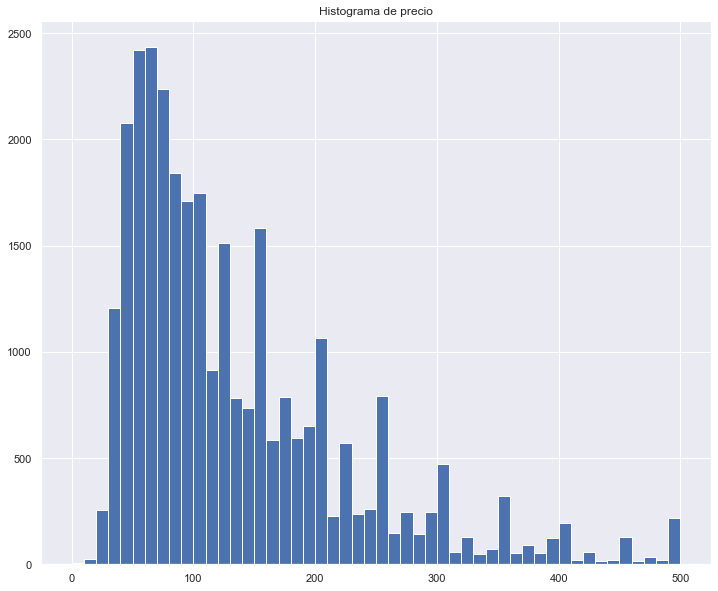

In [27]:
plt.figure(figsize=(12,10))
plt.hist(listings['price'],50)
plt.title("Histograma de precio")

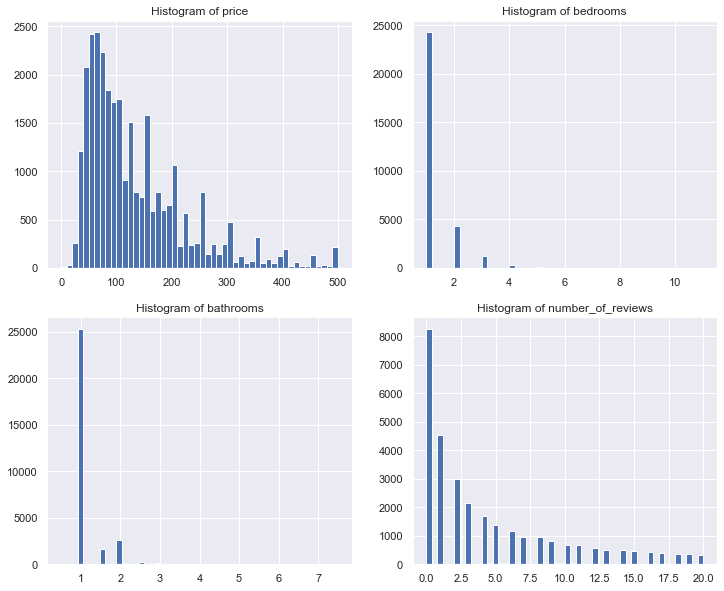

In [6]:
plt.figure(figsize=(12,10))
vars_to_plot = ['price', 'bedrooms','bathrooms','number_of_reviews']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    plt.hist(listings[var],50)
    title_string = "Histogram of " + var
    plt.title(title_string)

**Answer.** All look somewhat skewed to the right, though the ```bathroom``` variable is so concentrated at a single entry that it is hard to tell.

Are the distributions fairly smooth, or do they exhibit "spiky" or "discontinuous" behavior? If the latter, can you explain where it might come from?

**Answer.** The ```price``` variable is noticeably spiky. There is a nice bulk of prices between about 25 and 300 dollars, with very obvious spikes at nice, round numbers such as 50, 100, 150, 200, 250, and 300. This probably reflects the fact that people enter in the prices that they wish to list at, and so tend to choose round numbers (or numbers just below round numbers).

Can you detect any outliers from these histograms? If so, do they suggest (i) data error; or (ii) data that should be omitted from our future analysis?

**Answer.** Very few places had prices of more than $320, and so we might think of these as "outliers". Some of these may represent error, but we guess that most of them are correct – hotels in NYC certainly often go for over 400 dollars per night, and so it is not unreasonable to expect some Airbnb listings of this price. The question as to whether we should omit these outliers is a little more difficult, but we lean towards omitting them for <b>most</b> clients. Even if these prices are correct, we suspect that they are governed by idiosyncratic factors that are not as relevant to the listings that most of our clients are interested in analyzing. Thus, they will tend to give us misleading (or "biased") results. 

### Another way to look at the histogram of number of bedrooms

Sometimes, it is better to look at a histogram which plots the <i>relative</i> percentages of values across categories:

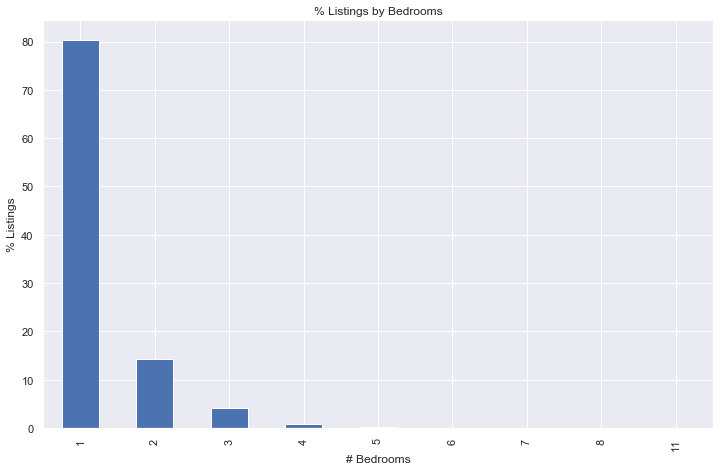

Percent of 1 Bedroom Listings: %80.37


In [7]:
# How many bedrooms
bedrooms_counts = Counter(listings.bedrooms) #A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values.
tdf = pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
tdf = (tdf.iloc[-10:, :] / len(listings)) * 100

# Sort bedroom dataframe by number
tdf.sort_index(axis = 0, ascending = True, inplace = True)

# Plot percent of listings by bedroom number
ax = tdf.plot(kind = 'bar', figsize = (12, 7.5))
ax.set_xlabel("# Bedrooms")
ax.set_ylabel("% Listings")
ax.set_title('% Listings by Bedrooms')
ax.legend_.remove()

plt.show()

print("Percent of 1 Bedroom Listings: %{0:.2f}".format(tdf[0][1])) 
#The syntax 0:.2f denotes that we will print upto to decimal places
#Change it to %{0:.3f to see what happens}

## Inspecting price against variables of interest

Now that we have looked at the variables of interest in isolation, it makes sense to look at them in relation to price.

### Exercise 2:

#### 2.1
Write code for making a boxplot of ```price``` vs. ```bedrooms```, ```bathrooms```, ```number_of_reviews```, ```review_scores_cleanliness```.

**Answer.** One possible solution is given below:

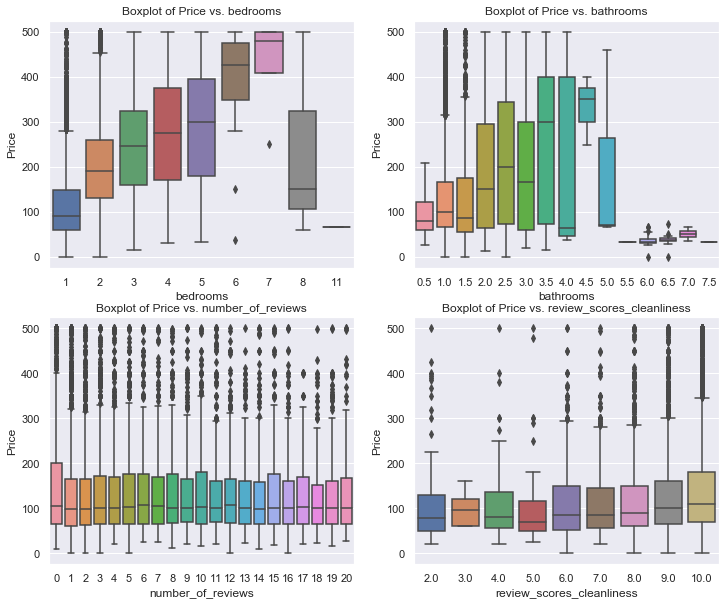

In [8]:
plt.figure(figsize=(12,10))
vars_to_plot = ['bedrooms','bathrooms','number_of_reviews','review_scores_cleanliness']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='price', data = listings)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)


#### 2.2

Comment on the relationship between price and the respective variable in each of the above plots.

**Answer.**

1. As expected, the median price increases with the number of bedrooms. This relationship also seems linear.
2. Again as expected, the price on average seems to increase with the number of bathrooms. There seems to be some outliers which defy this trend.
3. The number of reviews do not seem to affect the median price. 
4. There seems to be a slight increase in median price with increase in cleanliness review scores.

### Investigating correlations

Although plotting the relationship between price and a few other variables is a good first step, overall there are too many variables to individually plot and manually inspect. We need a more systematic method. How do we proceed? An easy way to get a quick overview of the key variables that affect the price is via <b>correlation</b>.

Let's look at the ```price``` vs. ```bedrooms``` plot again:

Text(0.5, 1.0, 'Boxplot of Price vs. Bedrooms')

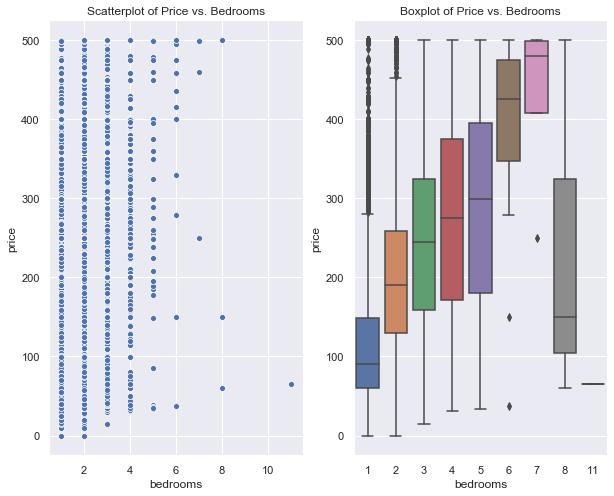

In [9]:
plt.figure(figsize=(10,8))
plt.subplot(121)
sns.scatterplot(x='bedrooms',y = 'price', data = listings)
plt.ylabel("price")
plt.title("Scatterplot of Price vs. Bedrooms")
plt.subplot(122)
sns.boxplot(x='bedrooms',y= 'price', data = listings)
plt.ylabel("price")
plt.title("Boxplot of Price vs. Bedrooms")

We see that as the number of bedrooms increases, the price on average increases. The quantity <b>correlation</b> is one way to capture this relationship. The correlation of two quantities is a measurement of how much they tend to increase together, measured on a scale going from -1 to 1. A positive correlation between price and number of bedrooms would indicate that higher-priced listings tend to have <i>more</i> bedrooms. Similarly, a negative correlation between price and number of bedrooms would indicate that higher-priced listings tend to have <i>fewer</i> bedrooms.  In our case, we can easily see that price is positively correlated with bedrooms.

Since correlation is just a single number summarizing an entire joint distribution, it can be misleading and does not eliminate the need to plot and visually inspect the key variables that it suggests are important. Nonetheless, it is quite helpful when quickly scanning for very strong relationships in the data and whittling down a much larger list of potential factors.

In [10]:
np.corrcoef(listings['price'],listings['bedrooms'])[0,1]

0.4545392952627167

The <b>correlation matrix</b> then gives all of the pairwise correlations between all of the variables. We can get a quick overview of the key variables that affect the price by looking at its row in the correlation matrix.

In [28]:
listings.corr()

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
id,1.000000,0.567767,0.530654,0.103325,0.062122,0.071475,-0.351613,-0.005784,0.109353,0.095344,0.041364,0.052900,0.081639,0.027533,0.073860,0.015423,0.000090,NaN,0.275434,0.310207,0.323030,0.241093,-0.099074,0.281097,0.005712,-0.008610,0.051732,-0.026479,-0.046465,0.061172,0.018077,0.370174,0.119937,0.098897,0.111743,0.074851,0.557623,-0.238283,0.053860,0.001858,0.061554,0.073392,0.038773,0.197887,0.087920,0.007983,0.189066,0.179178,0.018486,-0.012869,0.060977,-0.335233,0.093657,0.065741,0.067887,-0.019574,0.004068,0.133459,-0.055286,0.264720,-0.062950,0.143029,0.002802,-0.074635,0.026211
host_id,0.567767,1.000000,0.905404,0.031051,0.002383,0.036721,-0.471233,0.025581,0.128454,0.103469,0.058319,0.055659,0.114607,0.028931,0.093609,0.030244,0.000424,NaN,0.293828,0.333110,0.350964,0.299765,-0.031790,0.191829,-0.082189,-0.089129,-0.001015,-0.084407,-0.105143,-0.016744,-0.063119,0.304739,0.150896,0.125094,0.140272,0.075075,0.431707,-0.149752,0.048199,-0.004128,0.006306,0.015449,0.024602,0.161820,0.024614,0.043710,0.140030,0.106922,-0.043834,-0.013130,0.034135,-0.233112,0.051000,0.008452,0.033211,-0.001314,-0.020248,0.121658,-0.046604,0.164151,-0.051488,0.039264,0.000612,-0.033810,0.014483
host_since,0.530654,0.905404,1.000000,0.029362,-0.005315,0.056799,-0.460919,0.043202,0.133671,0.059946,0.037348,0.021578,0.082001,-0.009671,0.051555,0.000478,-0.003294,NaN,0.239441,0.273200,0.291389,0.242459,-0.052206,0.162810,-0.090009,-0.087586,-0.022991,-0.082780,-0.104489,-0.027066,-0.065790,0.289922,0.144230,0.119375,0.134057,0.077951,0.360644,-0.126710,0.026867,-0.000546,0.003265,0.006753,0.026418,0.137461,0.023077,0.036480,0.115689,0.082969,-0.047184,-0.005512,0.034853,-0.213517,0.033959,0.003663,0.032550,0.008638,-0.024976,0.102444,-0.037173,0.134174,-0.033657,0.027736,0.017108,-0.038432,0.020046
host_response_rate,0.103325,0.031051,0.029362,1.000000,0.133280,0.071515,-0.021462,-0.000586,0.018393,0.067337,0.041781,0.037776,0.046493,0.034280,0.048346,0.012583,-0.002015,NaN,-0.096749,-0.092871,-0.090221,-0.043331,0.101951,0.144492,0.050464,0.047434,0.073322,0.056361,0.064596,0.032622,0.037690,0.130772,0.080812,0.073679,0.041405,0.029622,0.167471,-0.001621,0.036806,0.023568,0.058347,0.047595,0.013415,0.129689,-0.015465,0.019995,0.124320,0.116666,0.024969,-0.015566,0.005100,-0.015891,0.066006,0.065656,0.036693,0.011373,0.074723,0.089964,-0.007350,0.056537,-0.009455,0.112369,-0.043715,0.019444,-0.020509
host_is_superhost,0.062122,0.002383,-0.005315,0.133280,1.000000,-0.021501,-0.000838,-0.017228,0.064378,0.026010,-0.003154,0.022136,0.020835,-0.016325,0.038419,0.065973,0.048219,NaN,0.034459,0.051846,0.062296,0.084598,0.246618,0.278945,0.113434,0.096486,0.118412,0.079193,0.081936,0.047967,0.091963,0.009774,-0.002636,-0.041604,0.199202,-0.016710,0.102082,-0.002945,0.039159,0.012663,0.026205,0.065132,0.017904,0.142496,0.021276,0.027264,0.137013,0.134466,0.007642,-0.051817,-0.027200,-0.003716,0.179669,0.074773,0.091193,-0.01834

### Exercise 3:

#### 3.1 Write code to compute the correlation matrix between the price and other quantities.
(use .corr() function). 

#### 3.2 Print the columns which are positively correlated, in increasing order of the correlation.
#### 3.3 Print the columns which are negatively correlated, in increasing order of the magnitude of the correlation. 

In [11]:
# Create a correlation matrix
corr    = listings.corr()
pos_cor = corr['price'] >0
neg_cor = corr['price']  <0
corr['price'][pos_cor].sort_values(ascending = False)
#This prints out the coefficients that are positively correlated with price.

price                                          1.000000
accommodates                                   0.571541
bedrooms                                       0.454539
beds                                           0.421355
guests_included                                0.321970
tv                                             0.271563
elevator                                       0.229610
calculated_host_listings_count_entire_homes    0.218890
white_goods                                    0.214283
gym                                            0.209892
child_friendly                                 0.206189
air_conditioning                               0.196582
host_listings_count                            0.194891
calculated_host_listings_count                 0.185098
bathrooms                                      0.163276
private_entrance                               0.146453
review_scores_location                         0.140308
coffee_machine                                 0

In [12]:
corr['price'][neg_cor].sort_values()

longitude                                      -0.294196
calculated_host_listings_count_private_rooms   -0.127504
calculated_host_listings_count_shared_rooms    -0.101389
smoking_allowed                                -0.054131
host_greeting                                  -0.051356
number_of_reviews                              -0.029229
host_identity_verified                         -0.022861
parking                                        -0.019383
host_is_superhost                              -0.016325
number_of_reviews_ltm                          -0.011481
host_since                                     -0.009671
review_scores_value                            -0.005942
Name: price, dtype: float64

#### 3.4:

From the table above, what factors are most correlated with price? Which correlations are surprising?

**Answer.** Many of these are unsurprising – for example, the largest correlations are with measures of size (```accommodates```, ```bedrooms```, ```beds```, etc.). Review scores are only slightly related to price. Looking at the location-related scores.

We also notice a few correlations that seem a bit surprising. For example:

1. Parking is negatively correlated to price. This correlation with parking is very suspicious – why would parking be bad? I suspect that it is "spurious", caused by the fact that parking is more common in less expensive neighborhoods. Let's investigate this by looking at parking in a region-by-region manner.
2. Being a superhost is negatively correlated; we don't follow up on it here.
3. The total number of listings is positively correlated. This seems counterintuitive, as one would want large-scale listers to be able to rent more cheaply due to economies of scale.

Let's use another method of checking correlations by making a heatmap, this is a useful tool to aid in the feature selection when building models.

Text(0.5, 1, 'Correlations between features')

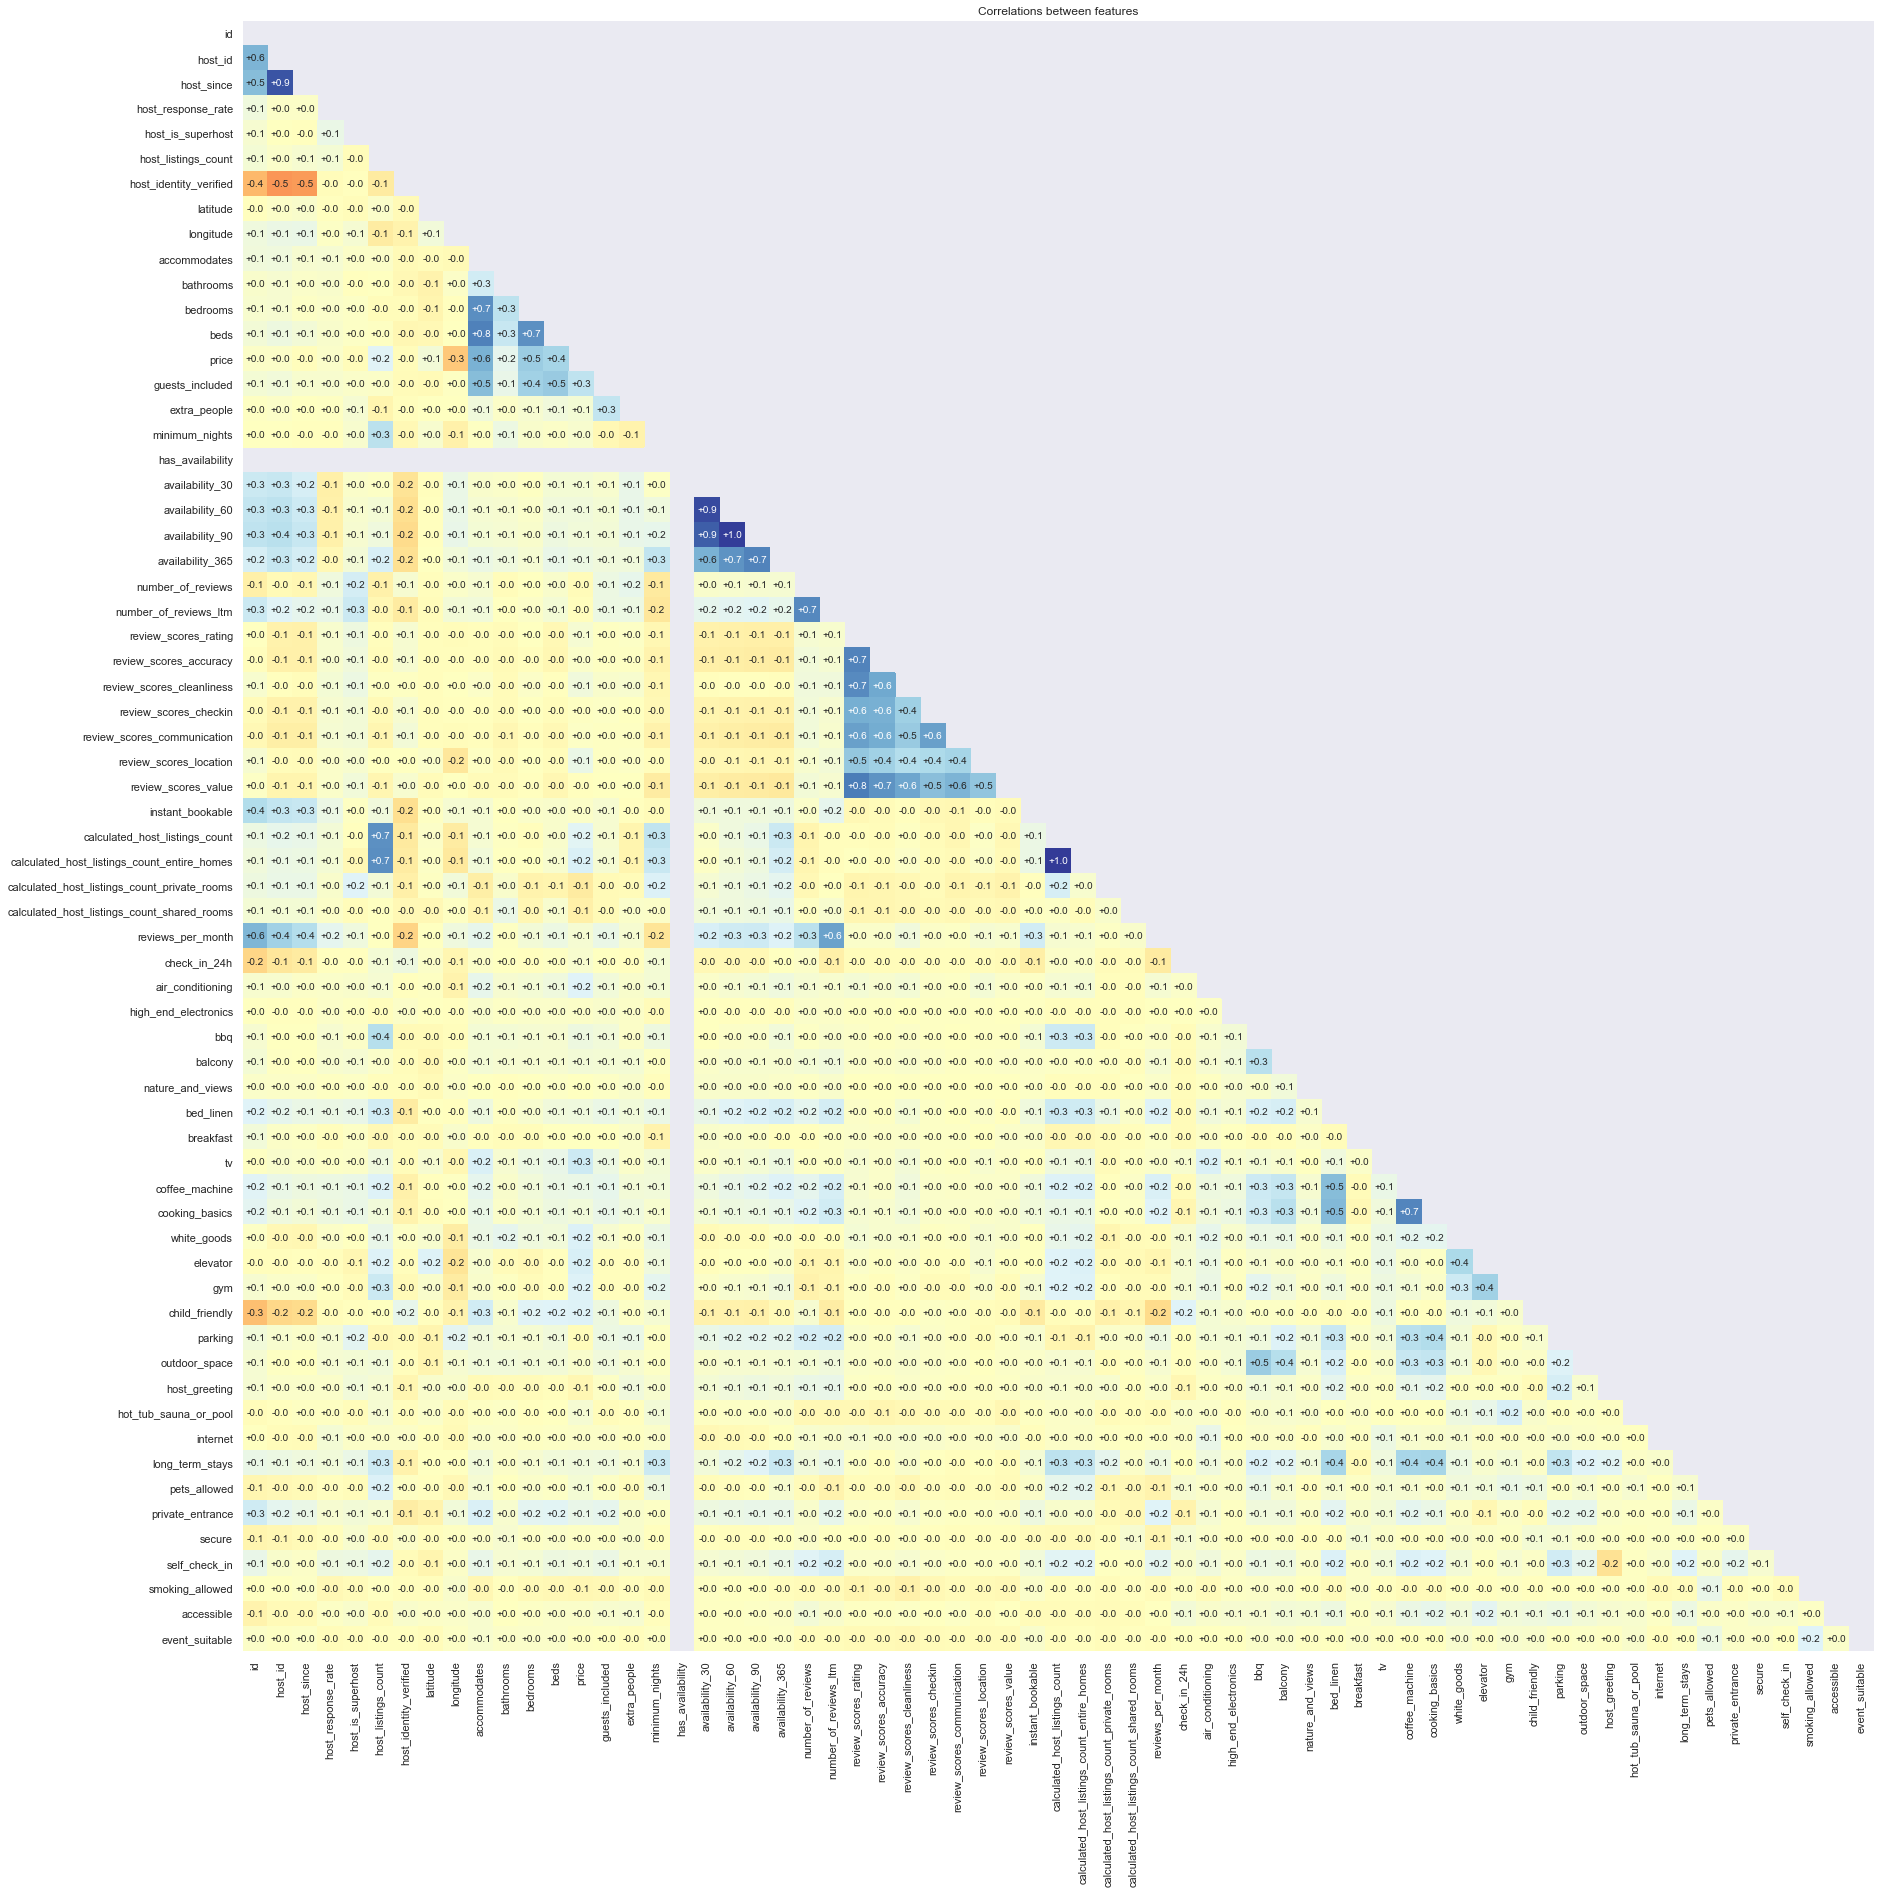

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1.0, vmax=1.0, fmt="+.1f", mask=np.triu(corr), cbar=False) # np.triu Returns copy of array with lower part of the triangle
plt.title("Correlations between features")

Write code to make a scatterplot between price and longitude, with number of bedrooms categorized by color.

Plot ```longitude``` vs. ```price```:

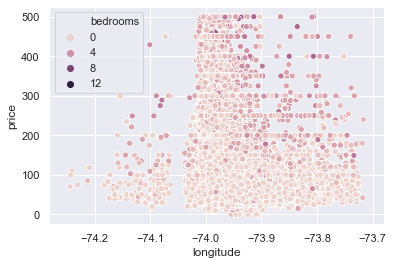

In [14]:
sns.scatterplot(x= listings['longitude'], y = listings['price'], hue = listings['bedrooms'])

When looking at the list of correlations, ```parking``` stood out as having a surprisingly negative correlation with price. We've seen that location has a strong influence on price; let's see if it can help explain the negative correlation exhibited by ```parking```.

## Interaction effects and iterative hypotheses

Now that we have explored some of the factors that are expected to affect price, let's focus on understanding the unexpected correlations, such as the negative correlation with parking. We start with the latter:

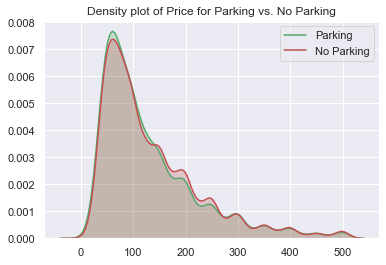

In [15]:
# First, plot parking vs. non-parking prices.
sns.kdeplot(listings.loc[listings['parking'] == 1,'price'],shade = True, label="Parking",color="g")
sns.kdeplot(listings.loc[listings['parking'] == -1,'price'],shade = True, label="No Parking",color="r")
plt.title("Density plot of Price for Parking vs. No Parking");

We saw before that the correlation between price and parking is -0.019383. Since parking is desirable, we expect the price to increase with parking. When we see a pattern like this, we should suspect the existence of **interaction effects** that are complicating the parking vs. price relationship. Interaction effects are when the relationship between two variables is **conditional**, or depends on the value of a third, hidden variable.

What could this third variable potentially be? Well, we have seen that location has a huge impact on prices. Perhaps high-price areas don't have many parking spots, whereas low-price areas do? We don't know this for sure, but it's a worthwhile guess.

More formally, we hypothesize that this observed negative correlation is the result of interaction effects arising from location. In order to investigate this hypothesis, we ought to break down the locations by neighborhood and see if this negative correlation between price and parking still holds within neighborhoods. The neighborhoods are discrete and there are many listings per neighborhood, so we can simply compute the correlation for every neighborhood individually. Mathematically, this is exactly the same thing as conditioning on the neighborhood and computing the conditional correlation.

### Exercise 4:

#### 4.1
Write code to make a dictionary in which the keys are the `neighbourhoods` in the dataset and the values are the correlation between price and parking for that neighborhood.


#### 4.2 
Next plot a histogram of these correlations. 

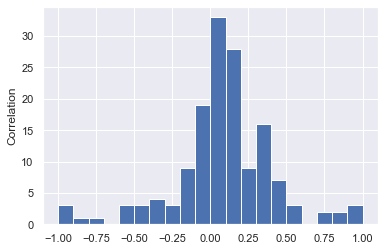

Average correlation:  0.08178058684472027


In [16]:
neighbourhoods = listings.neighbourhood.unique()
cvec = list()
cvec = dict()

for x in neighbourhoods:
    temp = listings[listings['neighbourhood'] == x]
    cvec[x] = temp.corr()['price']['parking']


res = list(cvec.values())
res = [x for x in res if str(x) != 'nan']
res.sort()


plt.hist(res, bins=20)
plt.ylabel('Correlation')
plt.show()


print('Average correlation: ', sum(res)/len(res))


#### 4.3 Explain the relationship between the histogram and our finding that parking is negatively correlated with price.

**Answer.** Our original correlation of about $-0.02$ was the correlation between price and parking <i>for all listings in NYC</i> – that is, the conditional correlation between price and parking <i> given that you are in NYC</i>. The number ```res['Brooklyn']``` is the correlation between price and parking <i>for all listings in Brooklyn</i> – that is, the conditional correlation between price and parking <i>given that you are in Brooklyn</i>. 

The histogram shows us that most of the conditional correlations within neighborhoods are positive, even though the correlation across all of NYC is negative. Roughly speaking, this means that the following are all occurring:

1. Within neighborhoods, parking is positively associated with price.
2. Different neighborhoods have very different typical prices (as we saw last section).
3. Parking tends to be concentrated in cheaper neighborhoods.

The correlation values of 1 and -1 are presumably due largely to neighborhoods with very few listings, and should essentially be ignored. Viewing the histogram, however, we can see that a clear majority of correlations are at least slightly positive, for an average correlation of 0.08.

#### 4.4
Plot the histogram that overlays the distribution of price for parking and non-parking (use sns.kdeplot) for the neighborhoods: `St. George`,`Greenwood Heights`,`Rego Park`,`Brooklyn Navy Yard`.

If we plot this by neighborhood for a few neighborhoods, we can see this somewhat positive correlation of parking vs. no parking visually: 

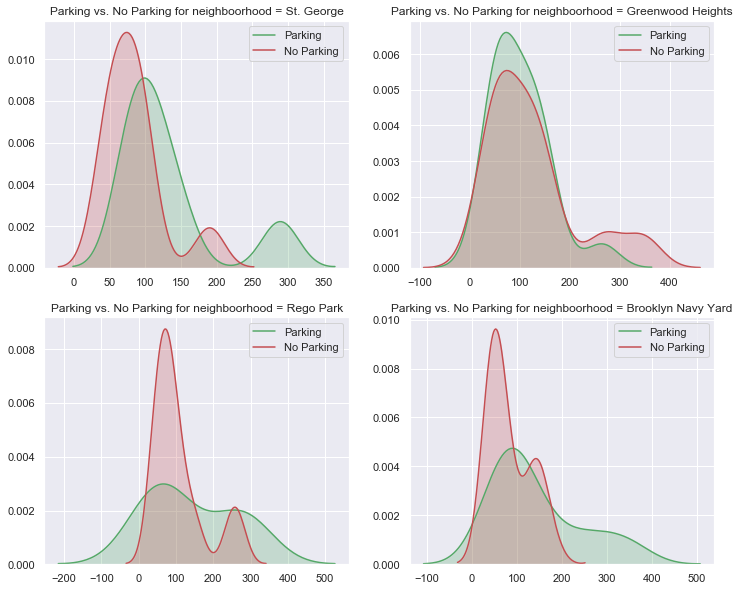

In [17]:
plt.figure(figsize=(12,10))
neigh_to_look = ['St. George','Greenwood Heights','Rego Park','Brooklyn Navy Yard']
for i, neigh in enumerate(neigh_to_look):
    plt.subplot(2,2,i+1)
    sns.kdeplot(listings.loc[(listings['parking'] == 1) & (listings['neighbourhood'] == neigh),'price'],shade = True, label="Parking",color="g")
    sns.kdeplot(listings.loc[(listings['parking'] == -1) & (listings['neighbourhood'] == neigh),'price'],shade = True, label="No Parking",color="r")
    plt.title("Parking vs. No Parking for neighboorhood = " + str(neigh));

As we have seen, the existence of unexpected correlations should spur investigation into potential interaction effects, which lead to potentially interesting hypotheses. Thus, one good way of generating iterative hypotheses is to find and think about potential interaction effects.

### Finding more interactions: how does price vary by property type?

We saw that finding conditional correlations or interactions is a good way to generate further hypotheses, as many interesting lines of investigation arise from investigating these **confounding variables**. Here is another example: let's now look at how price varies with property type. The following code plots the price of a one bedroom listing broken down by the property type:

## Exercise 5

#### 5.1
Write code to make a boxplot of price of one bedroom property across all property types.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

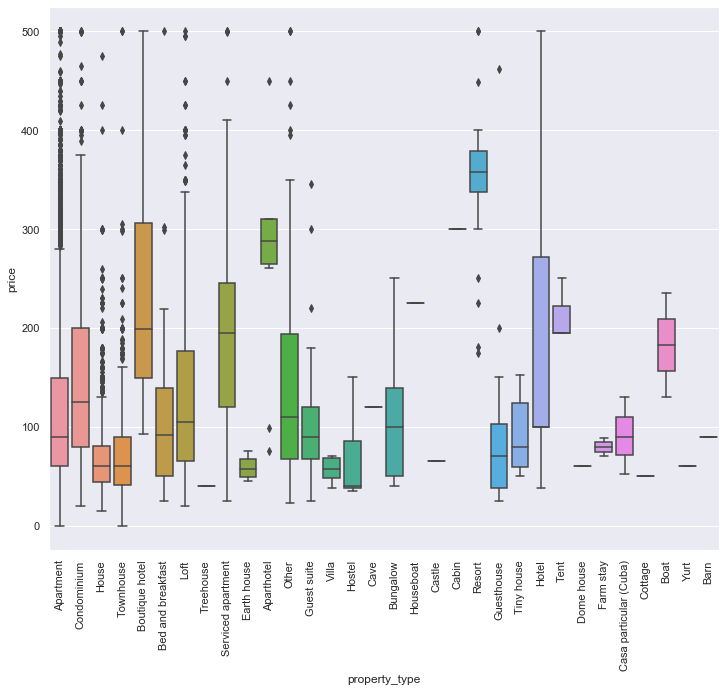

In [18]:
plt.figure(figsize=(12,10)) 
sns.boxplot(y=listings.loc[listings['bedrooms']==1,'price'], x= listings.loc[listings['bedrooms']==1,'property_type'])
plt.xticks(rotation = 90)

#### 5.2

What can you conclude about the variation in price of a one bedroom by the property type?

**Answer.** There is significant variation in price according to the property type; a room in a house or a loft is the cheapest, while cabins, boutique hotels, and boats are very expensive! It is also interesting to see huge variations in hotel prices.

#### 5.3

Do the same price vs. property type plot for two bedroom listings.

**Answer.** One possible solution is given below:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

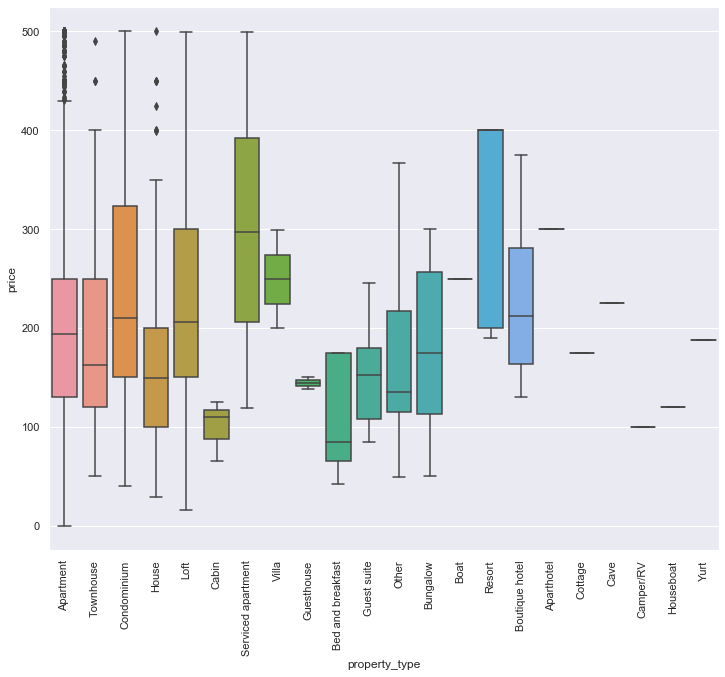

In [19]:
plt.figure(figsize=(12,10)) 
sns.boxplot(y=listings.loc[listings['bedrooms']==2,'price'], x= listings.loc[listings['bedrooms']==2,'property_type'])
plt.xticks(rotation = 90)

## Exploring temporal effects: summer in Rio and winter in Moscow

We have seen that conditional plots can be a useful way to "correct" comparisons by taking into account interaction effects.

Time is a very common interaction effect that appears across lots of datasets. For Airbnb data, this is especially important, as Airbnb is often more expensive near holidays, and so reasonable price estimates must take this into account. In practice this is one of the most important corrections offered by Airbnb pricing consultancy firms, and corrections usually take advantage of data pooled from many somewhat similar cities. This is vital to achieving good corrections, but it is easy to make mistakes by failing to account for important city-to-city differences.

We begin by opening up the calendar data and counting (i) the number of rentals per day; and (ii) their total prices: 

In [20]:
cal = pd.read_csv('scal.csv', delimiter=',')
cal.head()
# Count rentals and total price on each date.

,date,price
0,20190709,149.0
1,20190709,76.0
2,20190710,76.0
3,20190711,76.0
4,20190712,76.0


In [21]:
cal.shape

(17847182, 2)

In [22]:
rcount = dict()
rprice = dict()

for row in cal.itertuples(index=True, name='Pandas'): #The itertuples() function is used to iterate over DataFrame rows as namedtuples.
    rcount[str(row[1])] = rcount.get(str(row[1]), 0) + 1
    rprice[str(row[1])] = rprice.get(str(row[1]), 0) + row[2] 

In [23]:
# Next, plot the results. 
tempcount = sorted(rcount.items())
x, y = zip(*tempcount) #The purpose of zip is to map the similar index of multiple containers so that they can be used just using as single entity
tempprice = sorted(rprice.items())
u,v = zip(*tempprice)

In [24]:
# Next, we look at average price

tempprice = sorted(rprice.items())
u,v = zip(*tempprice)

ratio = lambda a,b: float(a)/float(b) 

avgprice = list(map(ratio, v,y))

xd = pd.to_datetime(x)


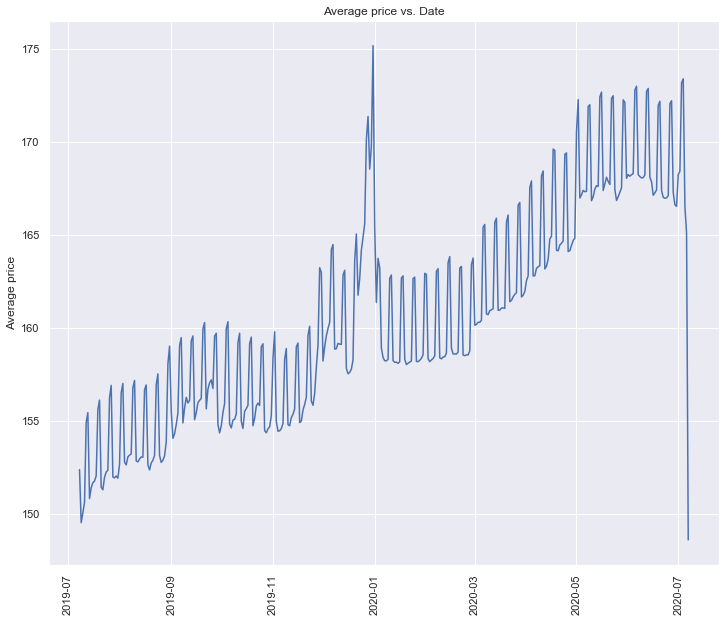

In [25]:
plt.figure(figsize=(12,10))
plt.plot(xd,avgprice)
plt.xticks(rotation = 'vertical')
plt.ylabel('Average price')
plt.title("Average price vs. Date")
plt.show()

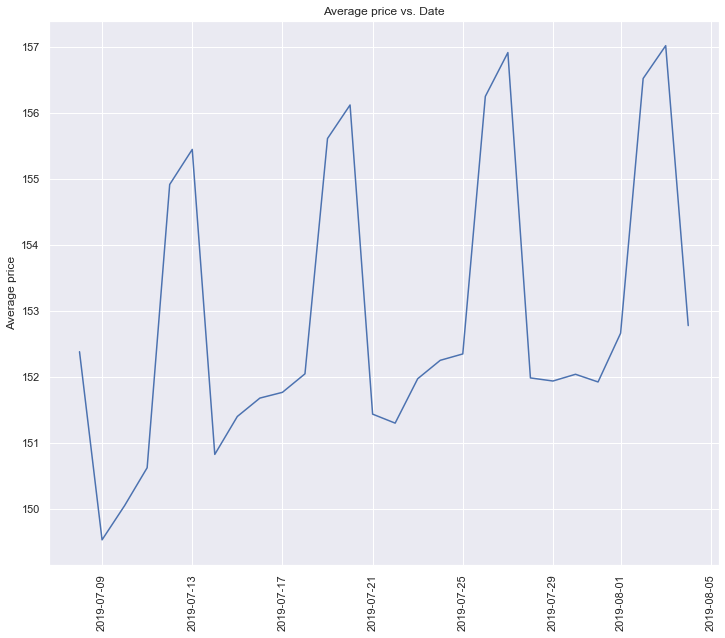

In [26]:
#Let us also plot a smaller time interval
plt.figure(figsize=(12,10))
plt.plot(xd[0:28],avgprice[0:28])
plt.xticks(rotation = 'vertical')
plt.ylabel('Average price')
plt.title("Average price vs. Date")
plt.show()

When analyzing time series data like this, it is common to view it as a sum of several contributing effects over time plus noise. The two common types of summands in such a representation are:

1. **Seasonal effects**: this is a summand that is periodic, often with period corresponding to the calendar (week, month or year).
2. **Trend effects**: this is a smooth summand that goes up or down slowly over an entire series, representing long-term trends such as price inflation.

### Exercise 6:

#### 6.1

Visually, can you see any strong seasonal or trend components? What do they mean?

**Answer.**

1. There is an extremely strong cyclical component that repeats every week. This corresponds to the fact that weekend travel is very different from weekday travel.
2. There is a trend of increasing prices over time.
3. Calendar components: this is a component with sharp "spikes" that is designed to correct for any idiosyncratic elements of our calendar. This might include: (i) a monthly time series with a dip in February (since it is the shortest month); (ii) spikes in months that contain five Saturdays (since there may be more spending on weekends); or (iii) a daily time series with a dip on Labor Day (when stores are closed).

#### 6.2

What is the enormous spike that you see in this chart? Is it real, and how would you describe what is going on in layman's terms?

**Answer.** This spike occurs at Christmas, the busiest holiday season. We expect it every year and must incorporate it in any reasonable model.

#### 6.3

Can we guess the busiest season (excluding Christmas) from this raw chart?

**Answer.** This would be difficult. Notice that this chart covers about a year, but there is a clear discontinuity if you try to "wrap" the data (i.e. the difference between the first and last day on this chart is significant). This is caused by an underlying trend of increasing prices every year. To figure out the best season, you would need to extract out this trend, which is difficult to do from a single year's data in a single city.

This brings us to an important topic: bringing in auxiliary datasets! The Inside Airbnb website includes calendar data for many cities, and we can use these to adjust for the trend component. To get some diversity, we should make sure to source some data from: (i) a city close to NYC; (ii) a city in the US with very different weather; and (iii) some cities very far away.

## Conclusions

In this case, we saw that Airbnb prices are influenced by many factors. Some of the main ones include location, date, number of bedrooms, number of guests, and property type.

Any future model we build should feature these factors. Incorporating some of these factors, such as the number of bedrooms, should be straightforward, as this has a large and nearly linear relationship to price. But others, such as location, exhibit very non-linear relationships.

We also found some surprising correlations, such as the negative correlation between price and parking. However, after breaking the data down by neighborhoods and incorporating the interaction effect of location, this negative correlation went away entirely.

Temporal effects are a very specific type of interaction effect which must be dealt with separately. Our exploration tells us that any model of AirBnB pricing should take into account strong seasonal components as well as strong spikes around major holidays. 

## Takeaways
In this case, you learned the following exploration process:

1. Start by looking at marginal distributions of quantities of interest to look for interesting patterns and/or outliers.
2. A correlation matrix can quickly reveal the most promising candidate variables for further investigation.
3. Investigate each of these candidate variables in turn. Note which ones exhibit interesting and unexpected correlations.
4. Explore potential interaction effects for the variables with unexpected correlations. Suspected important interactions should be looked at directly with further plotting.
5. Finally, take some time to carefully plot any interactions that you know to be important from domain knowledge. In our case, we looked at two features that are common to many datasets: location data and temporal data. Both of these contained very important signals that were immediately visually apparent, but which were strongly non-linear and could not easily be reduced to correlations or other simple summaries.

This process can be a bit daunting at first, but it is widely used by veteran data analysts and scientists and is extremely effective in most situations. By iteratively generating hypotheses throughout this process and investigating them, you can uncover great insight about what is going on without building a single formal model. Formal modelling will be discussed in future cases.

## Extended read

### Distribution shapes

https://mathbitsnotebook.com/Algebra1/StatisticsData/STShapes.html

### Understanding and Interpreting boxplots

https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

### Pandas display options

https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

### Python seaborn plotting tutorial

https://elitedatascience.com/python-seaborn-tutorial